# Avellaneda-Stoikov Model - Part4

```{note}
Practice!
```

In the previous chapter, we obtain the indifference mid price:

$$r(s, t) = s - q\gamma\sigma^{2}(T-t)$$

and the bid/ask spread:

$$\sigma^{a} + \sigma^{b} = \gamma\sigma^{2}(T-t) + \frac{2}{\gamma}\ln(1+\frac{\gamma}{k}).$$

For ETH, we have estimated:

* $\sigma=0.35$

* $k=2.856$

we can set:

* $\gamma = [0.01, 0.1, 1]$

* $T=$ every 1,8,24 hours.

## Testing

In [37]:
from utils import *

lst = read_jsonl('2024-05-29.json')
show_list(lst)

86400
[1716912000000, '3861.10000000', '3861.11000000', '3861.10000000', '3861.11000000', '0.36010000', 1716912000999, '1390.38375800', 21, '0.16480000', '636.31092800', '0']


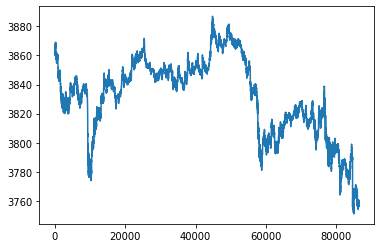

In [38]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(lst)), [float(item[1]) for item in lst])
plt.show()

In [71]:
import numpy as np


def one_step(kline: list, x: float, q: float, sigma: float, k: float, gamma: float, hour: float):
    timestamp, open_price, high_price, low_price = float(kline[0]), float(kline[1]), float(kline[2]), float(kline[3])
    timestamp = int(timestamp / 1000)
    gap = int(3600 * hour)
    T = (timestamp + gap - 1) // gap * gap

    mid_price = open_price - q * gamma * (sigma ** 2) * (T - timestamp)
    spread = gamma * (sigma ** 2) * (T - timestamp) + 2 / gamma * np.log(1 + gamma / k)
    
    buy_price = mid_price - spread / 2
    sell_price = mid_price + spread / 2
    if low_price < buy_price:
        x -= buy_price
        q += 1
        print('buy', mid_price, buy_price, x, q, x + q * mid_price)
    if high_price > sell_price:
        x += sell_price
        q -= 1
        print('sell', mid_price, sell_price, x, q, x + q * mid_price)
    return x, q

In [72]:
sigma = 0.35
k = 2.856
gamma = 0.01
hour = 2

In [73]:
start = np.random.randint(0, len(lst) - int(hour * 3600))
print(start)
x = 0
q = 0
for kline in lst[start: start + int(hour * 3600)]:
    x, q = one_step(kline, x, q, sigma, k, gamma, hour)

3986
buy 3845.25 3844.068696507136 -3844.068696507136 1 1.1813034928641173
sell 3841.557675 3842.738365992864 -1.3303305142717363 0 -1.3303305142717363
buy 3845.69 3844.585259007136 -3845.9155895214076 1 -0.22558952140752808
sell 3842.8008 3843.904928492864 -2.0106610285433817 0 -2.0106610285433817
buy 3841.99 3841.1039215071355 -3843.114582535679 1 -1.1245825356791102
sell 3838.928125 3839.813590992864 -3.3009915428146996 0 -3.3009915428146996
buy 3838.02 3837.148621507136 -3840.4496130499506 1 -2.4296130499506035
sell 3835.957525 3836.828290992864 -3.6213220570866724 0 -3.6213220570866724
buy 3836.6 3835.7414840071356 -3839.3628060642222 1 -2.7628060642223318
sell 3834.4032500000003 3835.2611534928647 -4.10165257135759 0 -4.10165257135759
buy 3834.8 3833.953121507136 -3838.0547740784937 1 -3.254774078493483
sell 3832.4965249999996 3833.3427909928637 -4.711983085629981 0 -4.711983085629981
sell 3835.0 3835.819928492864 3831.107945407234 -1 -3.892054592765817
buy 3836.779575 3835.96025